In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from copy import deepcopy

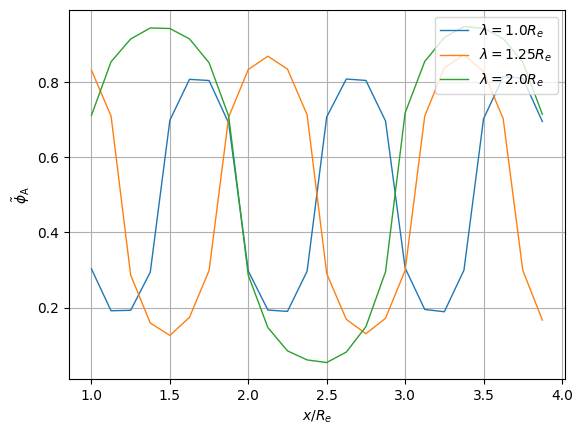

[0.49815613 0.40599622 0.24388969]


In [9]:
offset=1


plt.figure(dpi=100)
plt.grid()
def plot_conversion_range(lam):
    """plot Amplitude as a function of y
    """
    dir=f"lam{lam}/Nbar100"
    with h5py.File(f'{dir}/coord.h5', 'r') as f:
        ##number of beads per polymer
        N=int(f['parameter/reference_Nbeads'][()]) 
        ##number of polymers
        n_polym=int(f['parameter/n_polymers'][()]) 
        ##box dimensions 
        lxyz=np.array(f['parameter/lxyz'])
        ##box discretization
        nxyz=np.array(f['parameter/nxyz'])
        #discretization
        dxyz=lxyz/nxyz
        #adjust lengths and discretizations
        lxyz=lxyz-2*offset*dxyz
        nxyz=nxyz-2*offset
        #umbrella field
        umb_field=np.array(f["umbrella_field"])
        #area51
        area51=np.array(f["area51"])
        with h5py.File(f'{dir}/coord_ana.h5', 'r') as f:
            #only load every other frame, the others are not optimized
            phi=np.array(f['density_field'])
    kappa=30/N
    rho0=N*n_polym/np.prod(lxyz)
    var_phi=1/(rho0*np.prod(dxyz)*kappa)
    #only every other frame is optimized
    phi=phi[1::2]
    #average phi over time
    phi=phi.mean(axis=0)
    #number of accessible cells 
    n_cells=int(len(area51[area51==0]))
    n_cells_target=len(umb_field[umb_field>-1])
    #field scaling type
    scale=n_cells/(N*n_polym)
    #reshape density and umbrella field
    phi=phi*scale
    phi=phi[:,area51==0].reshape(phi.shape[0],nxyz[0],nxyz[1],nxyz[2])
    phi_tot=np.sum(phi,axis=0)
    #phi_tot[phi_tot==0]=1
    umb_field=umb_field[umb_field>-1].reshape(2,nxyz[0],nxyz[2])
    composition=deepcopy(phi)
    for j in range(2):
        composition[j]/=phi_tot
    #get phi and composition at y value where umbrella field is defined averaged over z
    composition_mean=composition[:,:,0,:].mean(axis=2)
    l_plot=np.arange(0,lxyz[0],dxyz[0])
    plt.plot(l_plot[8:-8],composition_mean[0][8:-8],lw=1,label="$\lambda=$"+f"{2*lam*dxyz[0]}"+"$R_e$")
    #plt.plot(l_plot[8:-8],composition_mean[0][8:-8],lw=1,label="measured")
    if(lam==1):
        plt.plot(l_plot[8:-8],umb_field[0].mean(axis=1)[8:-8],lw=1,label="target")
    opt=np.loadtxt(f"{dir}/opt.csv")[1::2]
    return opt.mean()/(n_cells_target*var_phi)


opts=np.empty(0)
#lams=np.array([1,2,4,5,8,10,20])
lams=np.array([4,5,8])
#lams=np.array([5])
for lam in lams:
    opts=np.append(opts,plot_conversion_range(lam))
plt.xlabel("$x/R_e$")
plt.ylabel(r"$\tilde\phi_\mathrm{A}$")
plt.legend(loc='upper right')
plt.savefig("amplitude_lamella_per.pdf")
plt.show()
print(opts)






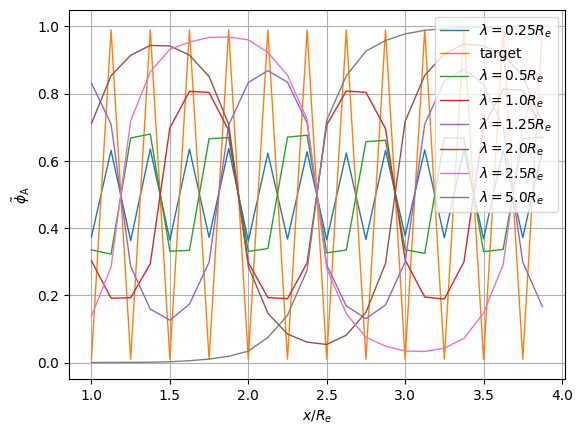

[0.94085453 0.7934473  0.49815613 0.40599622 0.24388969 0.19352806
 0.08618198]


In [10]:
offset=1


plt.figure(dpi=100)
plt.grid()
def plot_2d_composition(lam):
    """plot Amplitude as a function of y
    """
    dir=f"lam{lam}/Nbar100"
    with h5py.File(f'{dir}/coord.h5', 'r') as f:
        ##number of beads per polymer
        N=int(f['parameter/reference_Nbeads'][()]) 
        ##number of polymers
        n_polym=int(f['parameter/n_polymers'][()]) 
        ##box dimensions 
        lxyz=np.array(f['parameter/lxyz'])
        ##box discretization
        nxyz=np.array(f['parameter/nxyz'])
        #discretization
        dxyz=lxyz/nxyz
        #adjust lengths and discretizations
        lxyz=lxyz-2*offset*dxyz
        nxyz=nxyz-2*offset
        #umbrella field
        umb_field=np.array(f["umbrella_field"])
        #area51
        area51=np.array(f["area51"])
        with h5py.File(f'{dir}/coord_ana.h5', 'r') as f:
            #only load every other frame, the others are not optimized
            phi=np.array(f['density_field'])
    kappa=30/N
    rho0=N*n_polym/np.prod(lxyz)
    var_phi=1/(rho0*np.prod(dxyz)*kappa)
    #only every other frame is optimized
    phi=phi[1::2]
    #average phi over time
    phi=phi.mean(axis=0)
    #number of accessible cells 
    n_cells=int(len(area51[area51==0]))
    n_cells_target=len(umb_field[umb_field>-1])
    #field scaling type
    scale=n_cells/(N*n_polym)
    #reshape density and umbrella field
    phi=phi*scale
    phi=phi[:,area51==0].reshape(phi.shape[0],nxyz[0],nxyz[1],nxyz[2])
    phi_tot=np.sum(phi,axis=0)
    #phi_tot[phi_tot==0]=1
    umb_field=umb_field[umb_field>-1].reshape(2,nxyz[0],nxyz[2])
    composition=deepcopy(phi)
    for j in range(2):
        composition[j]/=phi_tot
    #get phi and composition at y value where umbrella field is defined averaged over z
    composition_mean=composition[:,:,0,:].mean(axis=2)
    l_plot=np.arange(0,lxyz[0],dxyz[0])
    plt.imshow(phi[0,])
    opt=np.loadtxt(f"{dir}/opt.csv")[1::2]
    return opt.mean()/(n_cells_target*var_phi)


opts=np.empty(0)
lams=np.array([1,2,4,5,8,10,20])
#lams=np.array([5])
for lam in lams:
    opts=np.append(opts,plot_conversion_range(lam))
plt.xlabel("$x/R_e$")
plt.ylabel(r"$\tilde\phi_\mathrm{A}$")
plt.legend(loc='upper right')
#plt.savefig("amplitude_lamella_per.pdf")
plt.show()
print(opts)






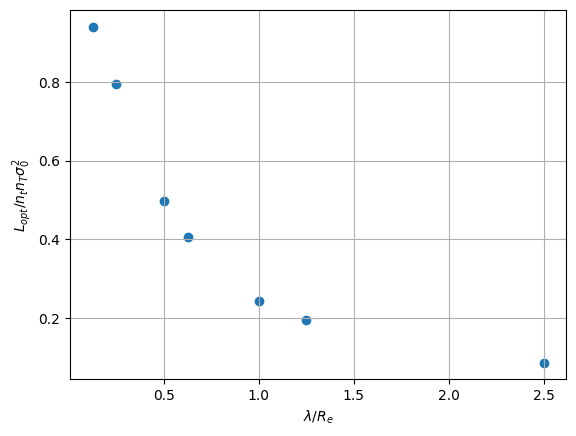

In [14]:
plt.figure(dpi=100)
plt.grid()
plt.xlabel("$\lambda/R_e$")
plt.ylabel("$L_{opt}/n_tn_T\sigma_0^2$")
plt.scatter(lams*0.125,opts)
plt.savefig("L_lambda.pdf")